In [3]:
##WHITE NOISE MODEL

[1] -0.29871681  0.06545278  0.41432466  0.06490746  1.09717496  0.77594330

[1]  0.9628658  0.3223636 -0.5490246 -0.8926643  0.3979566 -0.7308299

[1] TRUE

[1] -0.06031273

[1] 0.773288

[1] 0.879368

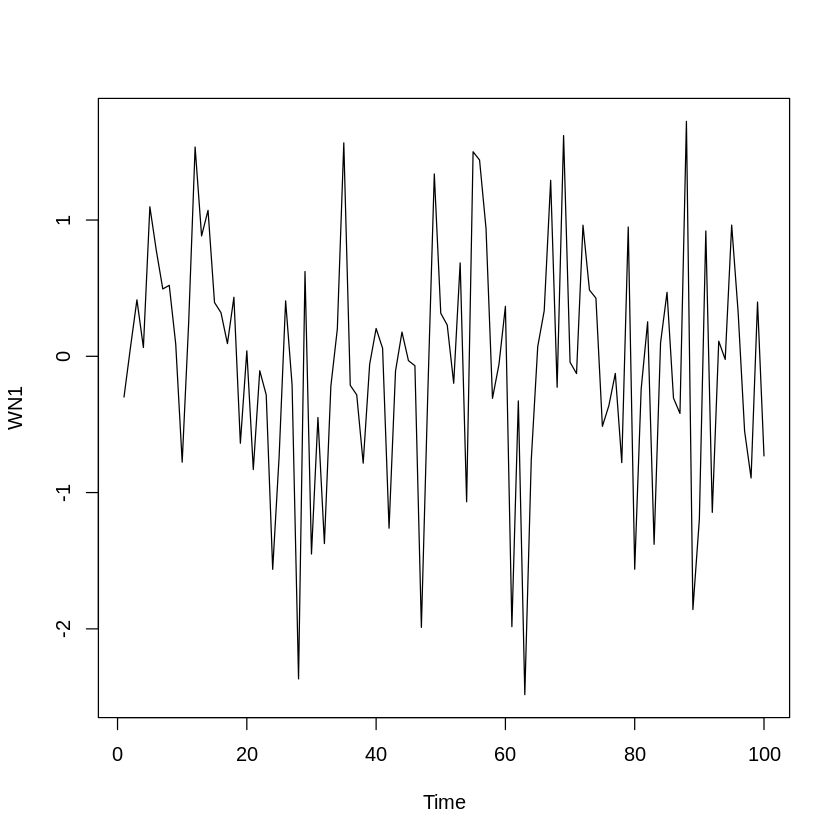

In [4]:
#Simulating White Noise Model with n=100
WN1<-arima.sim(model=list(order=c(0,0,0)),n=100)
head(WN1)
tail(WN1)
is.ts(WN1)
ts.plot(WN1)
mean(WN1)
var(WN1)
sd(WN1)

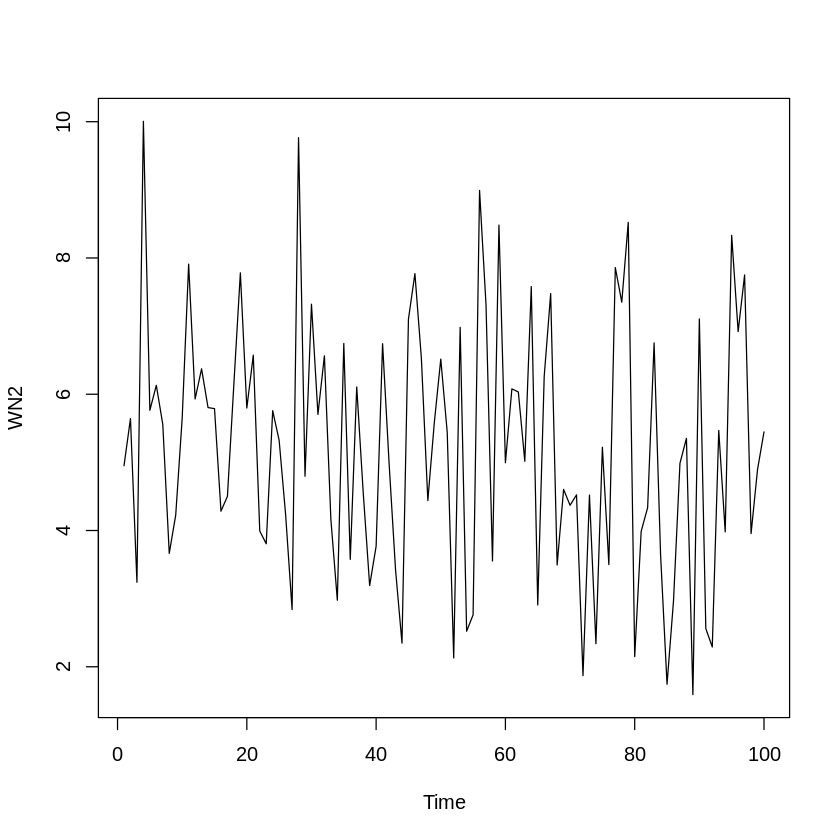

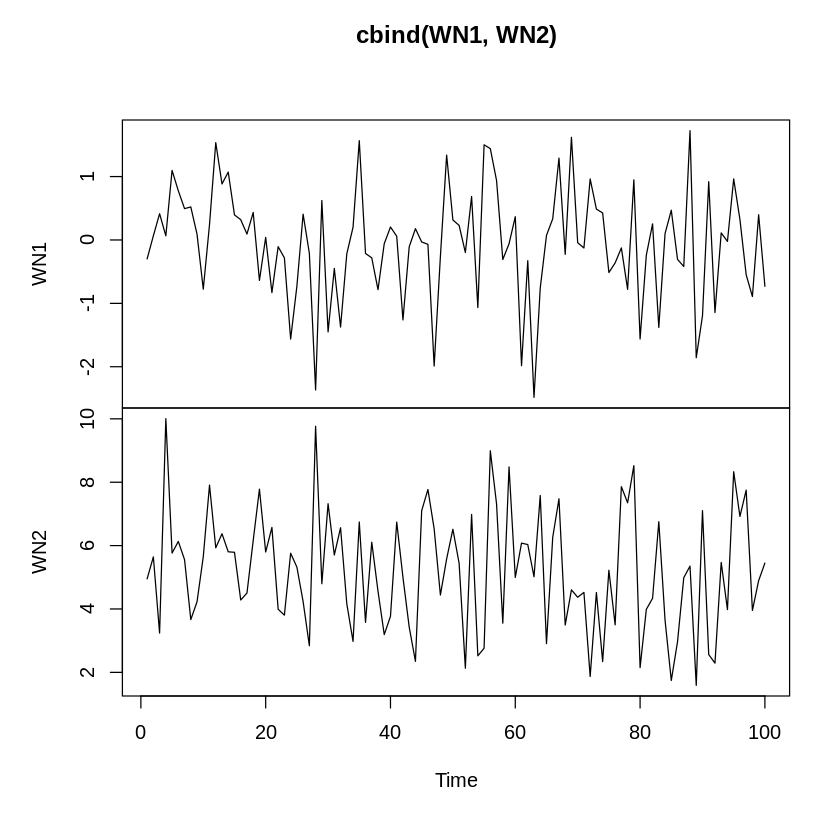

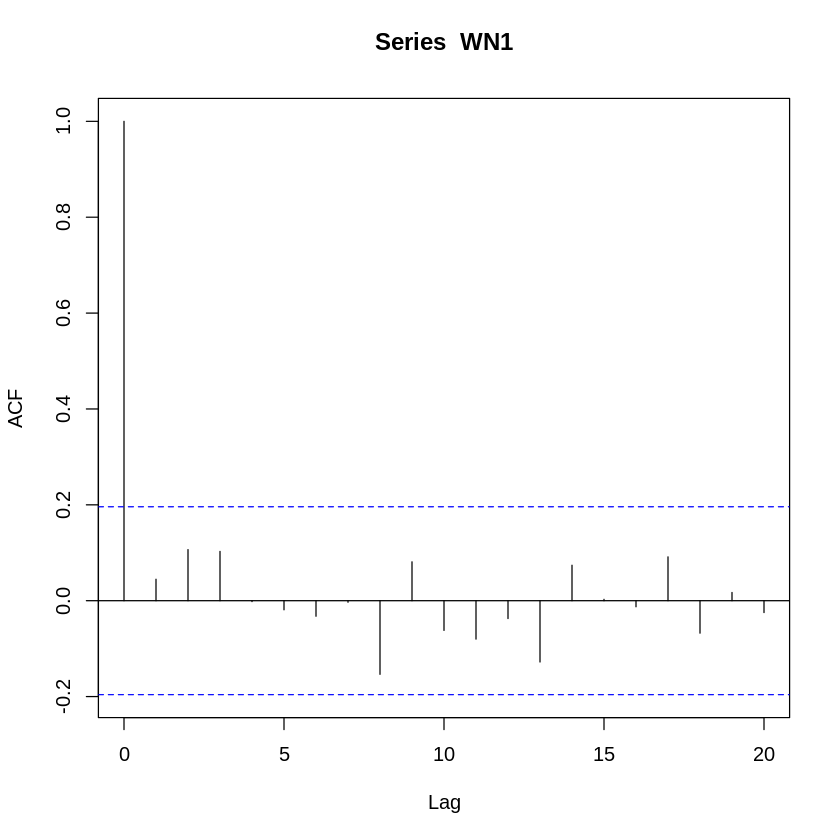

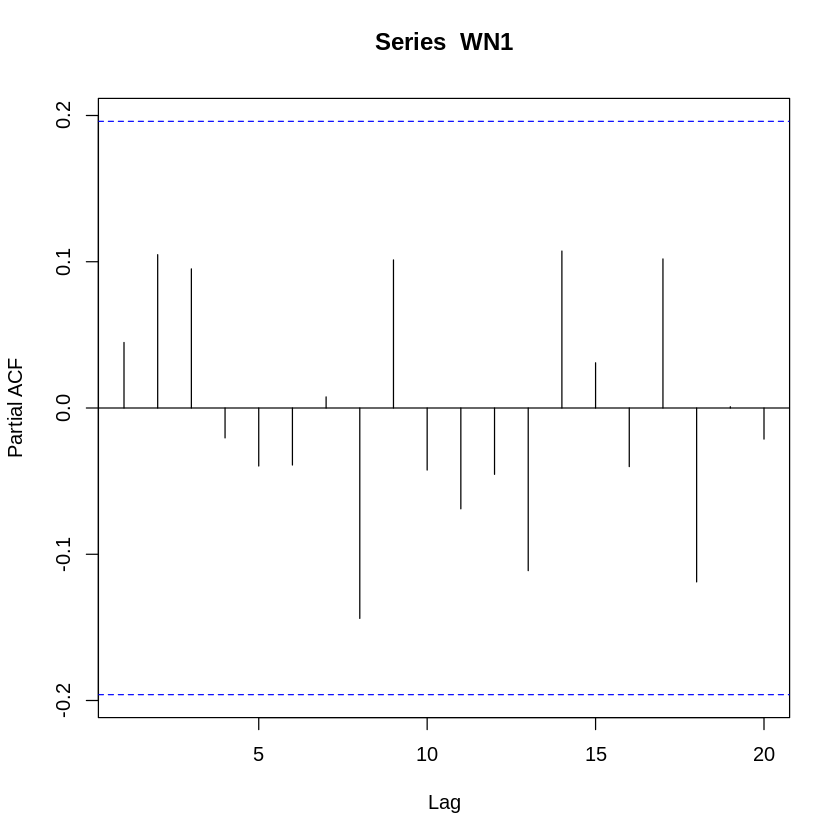

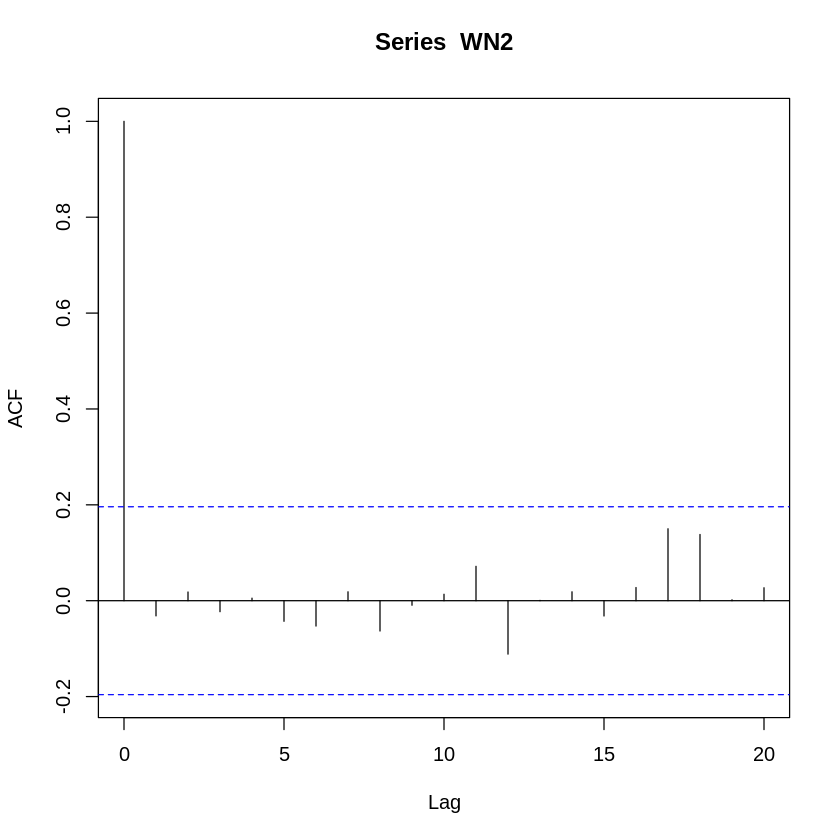

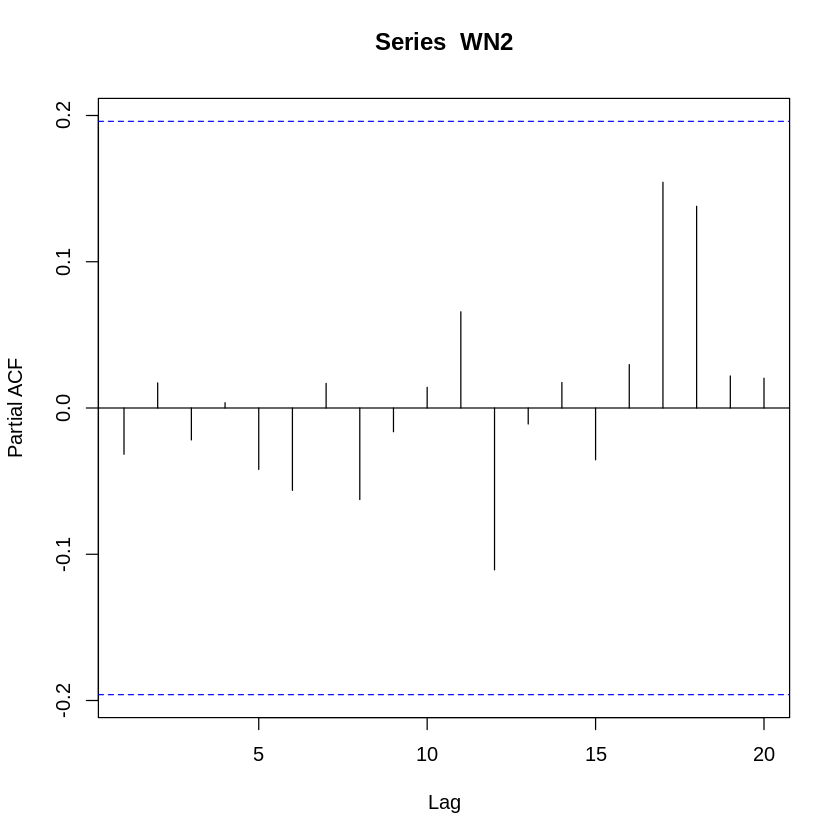

In [5]:
#Simulating White Noise Model with n=100WN1<-arima.sim(model=list(order=c(0,0,0)),n=100)head(WN1)tail(WN1)is.ts(WN1)ts.plot(WN1)mean(WN1)var(WN1)sd(WN1)#Simulating White Noise Model with n=100 with mean =5, sd =2
WN2<-arima.sim(model=list(order=c(0,0,0)),n=100, mean=5, sd =2)
ts.plot(WN2)
plot.ts(cbind(WN1,WN2))
acf(WN1)
pacf(WN1)
acf(WN2)
pacf(WN2)

In [6]:
#Installing tseries package and calling the function
install.packages("tseries")
library(tseries)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [7]:
#DF Test on White Noise
tseries::adf.test(WN1)


	Augmented Dickey-Fuller Test

data:  WN1
Dickey-Fuller = -4.0121, Lag order = 4, p-value = 0.01145
alternative hypothesis: stationary


In [8]:
#ADF on White Noise using default number of lags( amount of time dependency, for a time series of 100 this is 4)
tseries::adf.test(WN1, k=0)

Warning message in tseries::adf.test(WN1, k = 0):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  WN1
Dickey-Fuller = -9.4301, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


In [9]:
#DF test on White Noise with trend and intercept
intercept <- 1
WNT <- WN1 + intercept
tseries:: adf.test(WNT)
pp.test(WNT)
kpss.test(WNT, null="Level")


	Augmented Dickey-Fuller Test

data:  WNT
Dickey-Fuller = -4.0121, Lag order = 4, p-value = 0.01145
alternative hypothesis: stationary


Warning message in pp.test(WNT):
“p-value smaller than printed p-value”



	Phillips-Perron Unit Root Test

data:  WNT
Dickey-Fuller Z(alpha) = -102.1, Truncation lag parameter = 3, p-value
= 0.01
alternative hypothesis: stationary


Warning message in kpss.test(WNT, null = "Level"):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  WNT
KPSS Level = 0.11428, Truncation lag parameter = 4, p-value = 0.1


In [19]:
##ADF test Uses a model that allows intercept and trend

In [12]:
# For a given time series "WN2" fit a white noise model
arima(WN2, order= c(0,0,0))


Call:
arima(x = WN2, order = c(0, 0, 0))

Coefficients:
      intercept
         5.2129
s.e.     0.1876

sigma^2 estimated as 3.521:  log likelihood = -204.83,  aic = 413.65

In [18]:
##What is the mean and variance of the fitted WN2? 

[1] TRUE

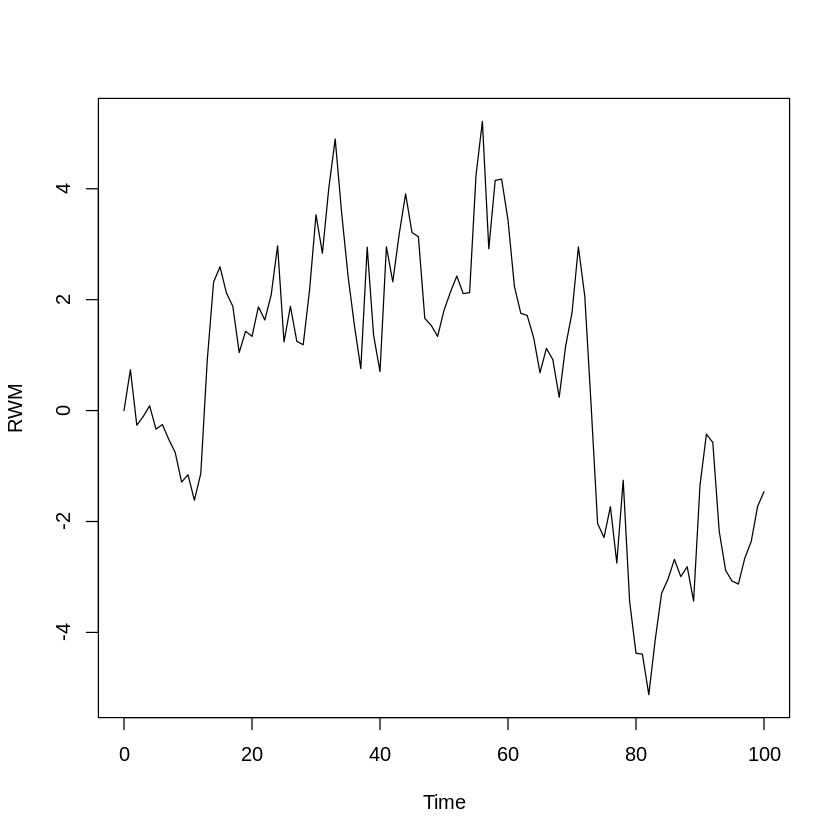

[1] 0.5573553

[1] 5.741435

[1] 2.396129

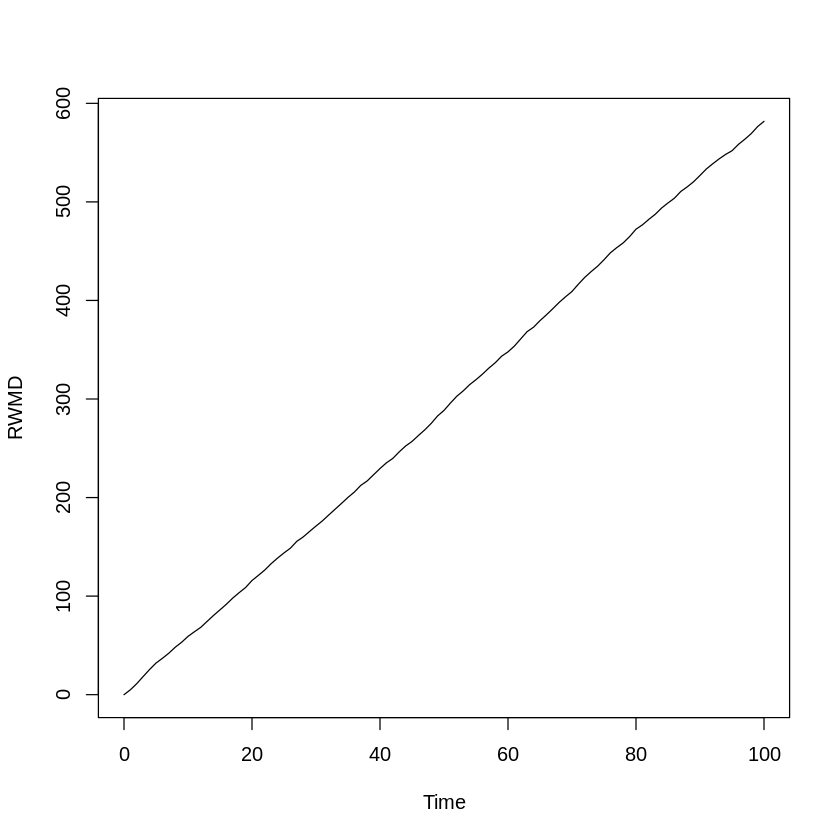

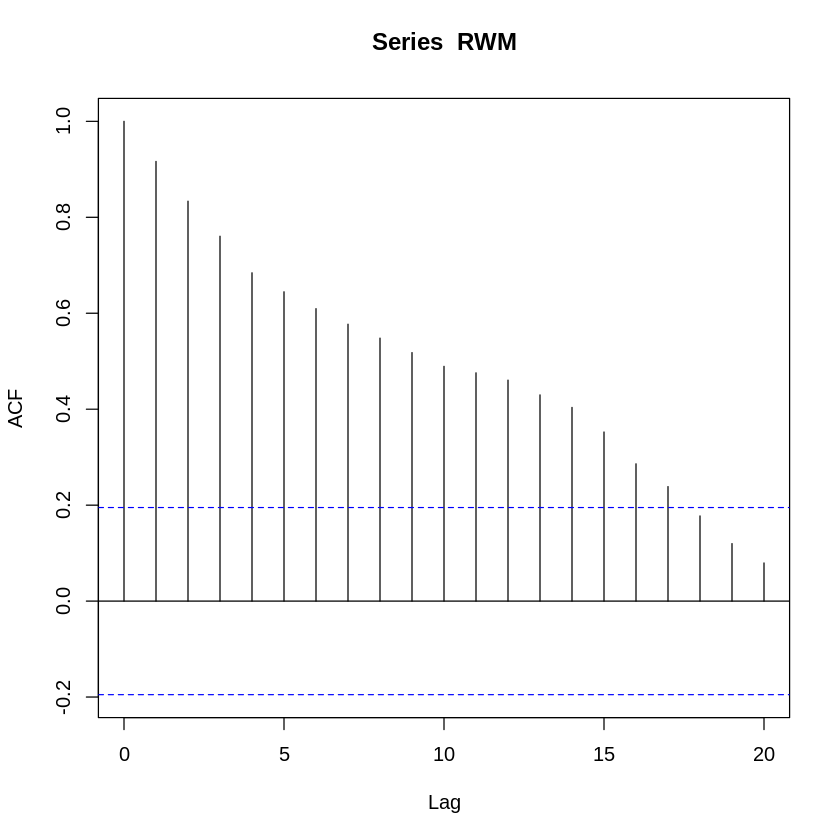

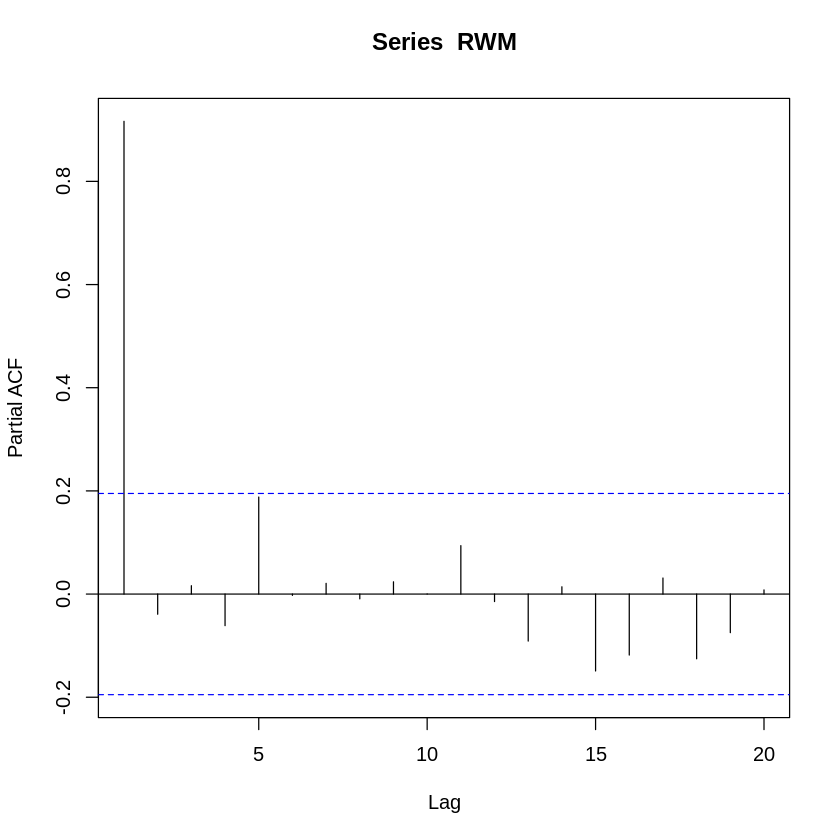

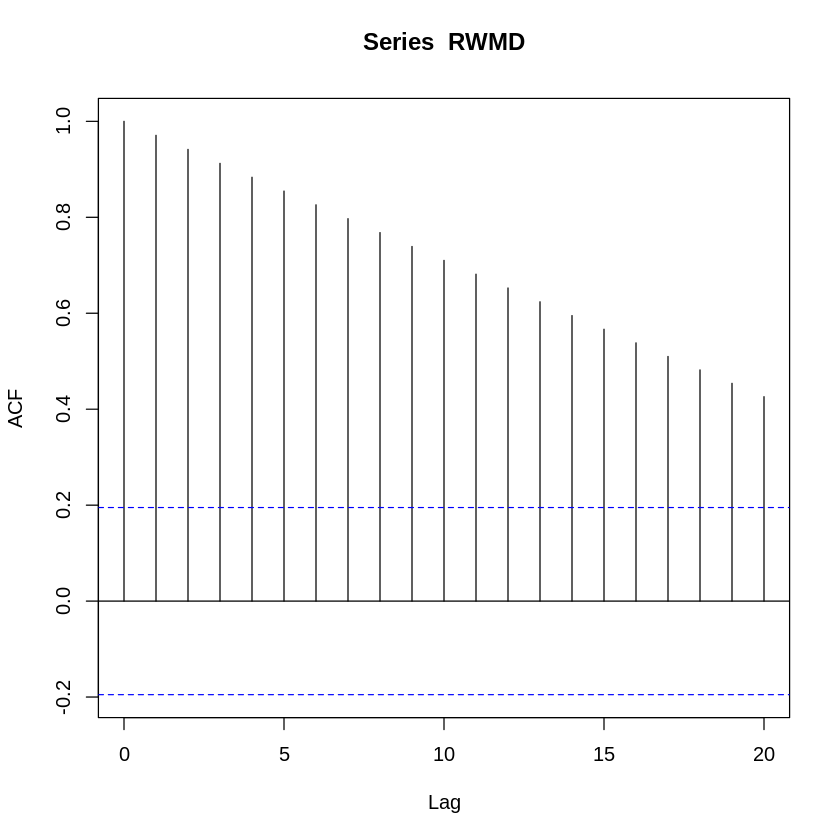


	Augmented Dickey-Fuller Test

data:  RWM
Dickey-Fuller = -1.9896, Lag order = 4, p-value = 0.581
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  RWM
Dickey-Fuller = -2.4498, Lag order = 0, p-value = 0.3902
alternative hypothesis: stationary



	Phillips-Perron Unit Root Test

data:  RWM
Dickey-Fuller Z(alpha) = -10.626, Truncation lag parameter = 4, p-value
= 0.4997
alternative hypothesis: stationary


Warning message in kpss.test(RWM, null = "Trend"):
“p-value smaller than printed p-value”



	KPSS Test for Trend Stationarity

data:  RWM
KPSS Trend = 0.3867, Truncation lag parameter = 4, p-value = 0.01


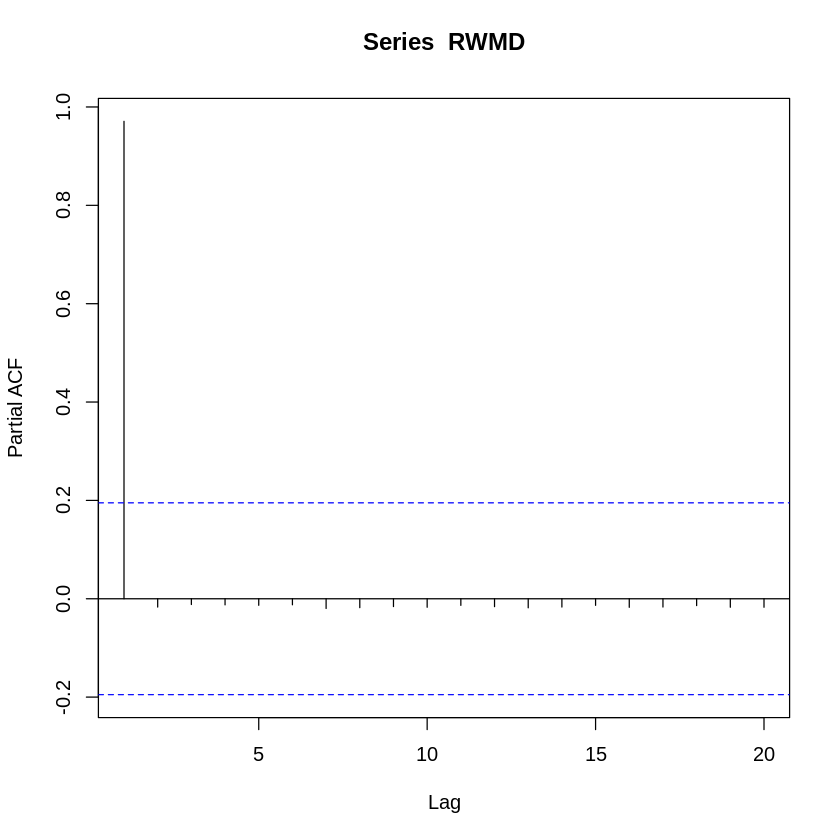

In [15]:
## Random Walk Model of size n=100
RWM <- arima.sim(model=list(order=c(0,1,0)),n=100)
RWMD<-arima.sim(model=list(order=c(0,1,0)),n=100,mean=6)
is.ts(RWM)
ts.plot(RWM)
ts.plot(RWMD)
mean(RWM)
var(RWM)
sd(RWM)
acf(RWM)
pacf(RWM)
acf(RWMD)
pacf(RWMD)
tseries::adf.test(RWM)
tseries::adf.test(RWM, k=0)
pp.test(RWM)
kpss.test(RWM, null="Trend")


Call:
arima(x = diffRWM, order = c(0, 0, 0))

Coefficients:
      intercept
        -0.0146
s.e.     0.0957

sigma^2 estimated as 0.9157:  log likelihood = -137.49,  aic = 278.98

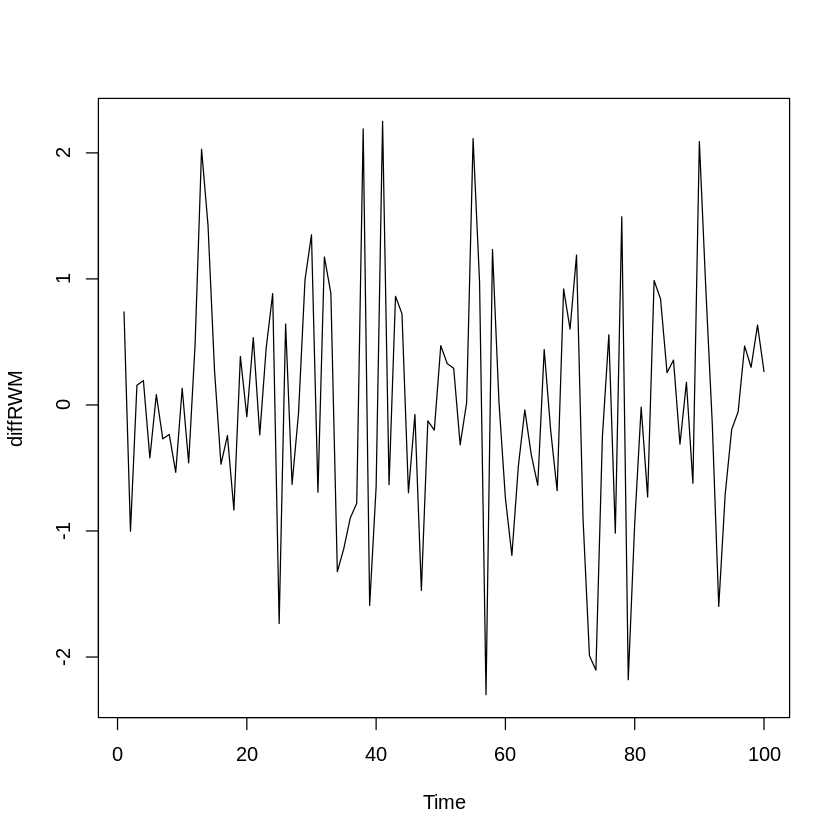

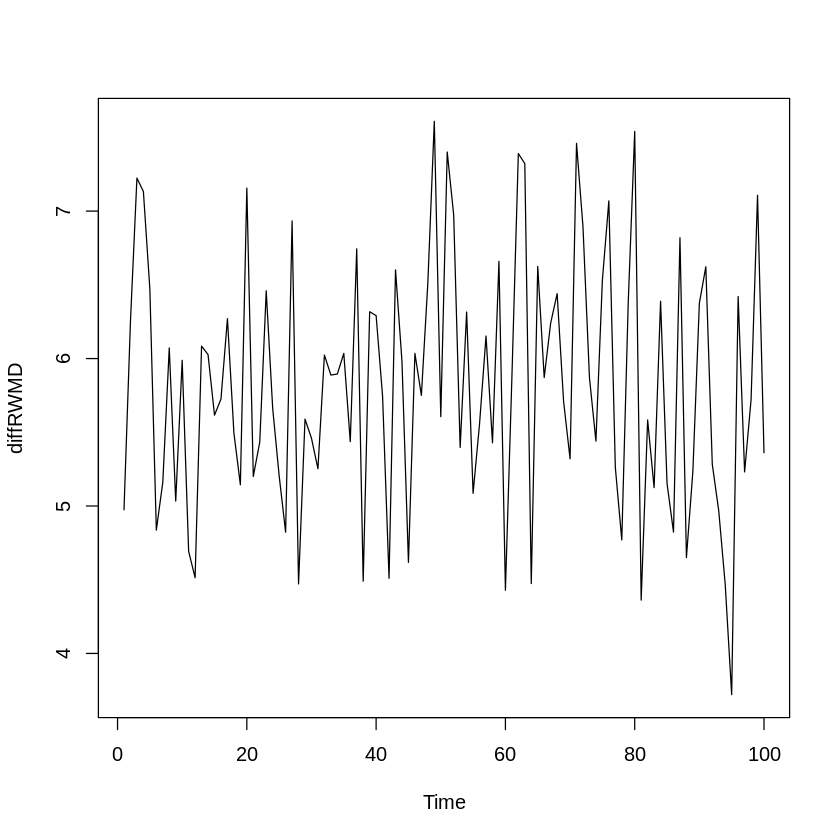

In [16]:
#Fitting RWM
diffRWM<- diff(RWM)
ts.plot(diffRWM)
arima(diffRWM, order= c(0,0,0))
diffRWMD<- diff(RWMD)
ts.plot(diffRWMD)

Warning message in min(Mod(polyroot(c(1, -model$ar)))):
“no non-missing arguments to min; returning Inf”


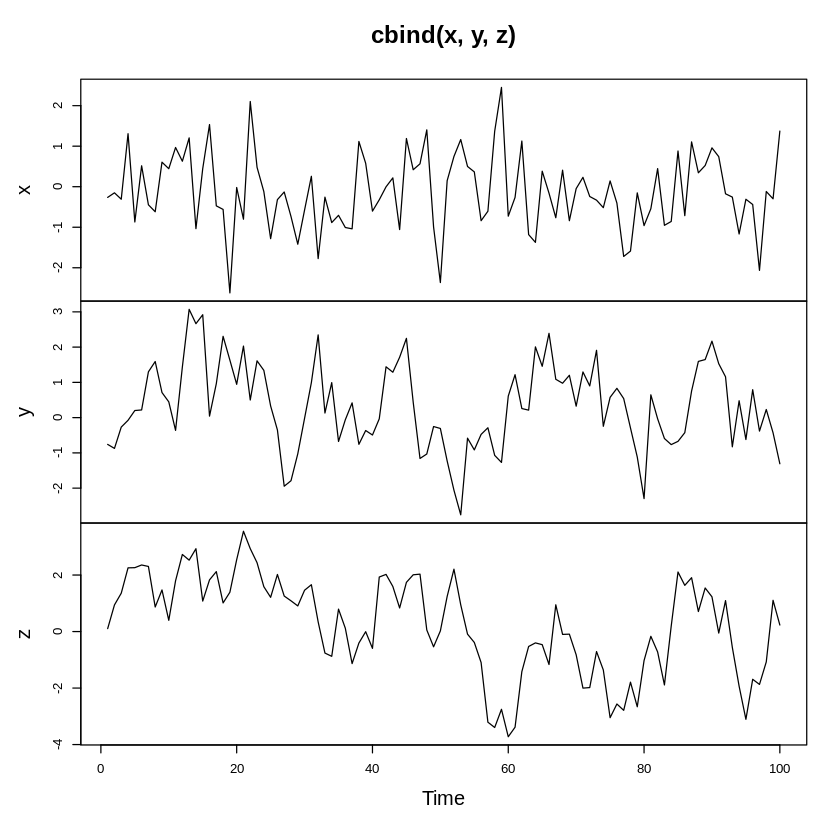

ERROR: ignored

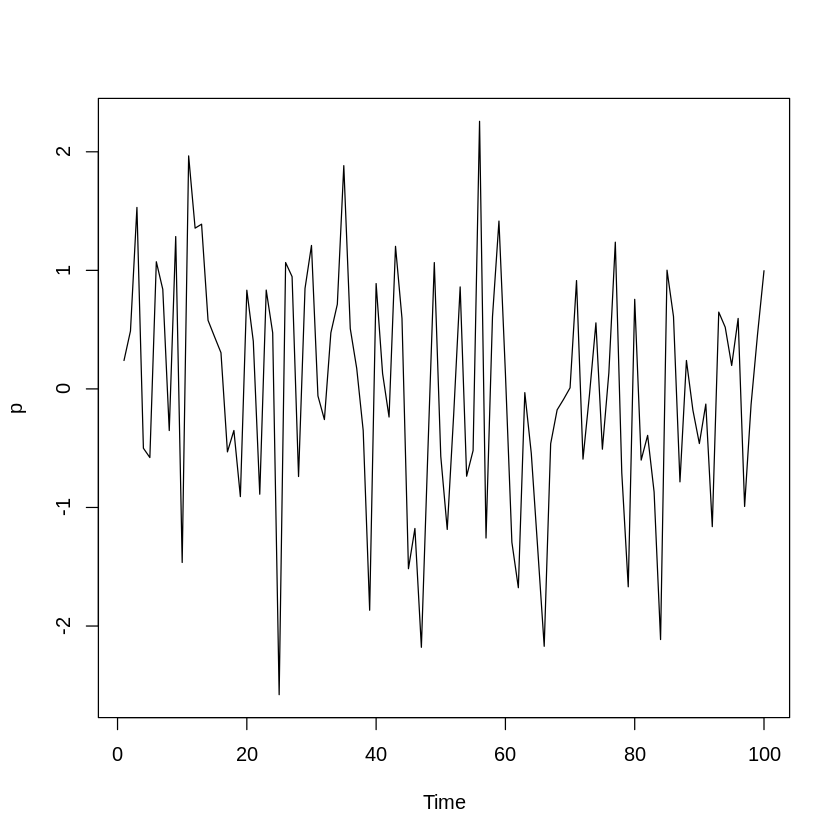

In [17]:
## AUTOREGRESSIVE MODEL
x<-arima.sim(model=list(ar=0.2), n=100)
y<-arima.sim(model=list(ar= 0.6), n=100)
z<-arima.sim(model=list(ar=0.8), n=100)
plot.ts(cbind(x,y,z))
p<-arima.sim(model=list(ar=0.0), n=100)
ts.plot(p)

w<-arima.sim(list(order=c(2,0,0),ar=0.6),n=100)
ts.plot(w)

ar2<-arima.sim(model=list(ar=c(0.9,-0.2)),n=100)
ts.plot(ar2)
acf(ar2)
tseries::adf.test(ar2)

In [20]:
# Fitting AR model
ar<-arima(x,order=c(1,0,0))
print(ar)
AIC(ar)
BIC(ar)


Call:
arima(x = x, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.1148    -0.1279
s.e.  0.1002     0.1040

sigma^2 estimated as 0.8498:  log likelihood = -133.76,  aic = 273.52


[1] 273.5222

[1] 281.3377

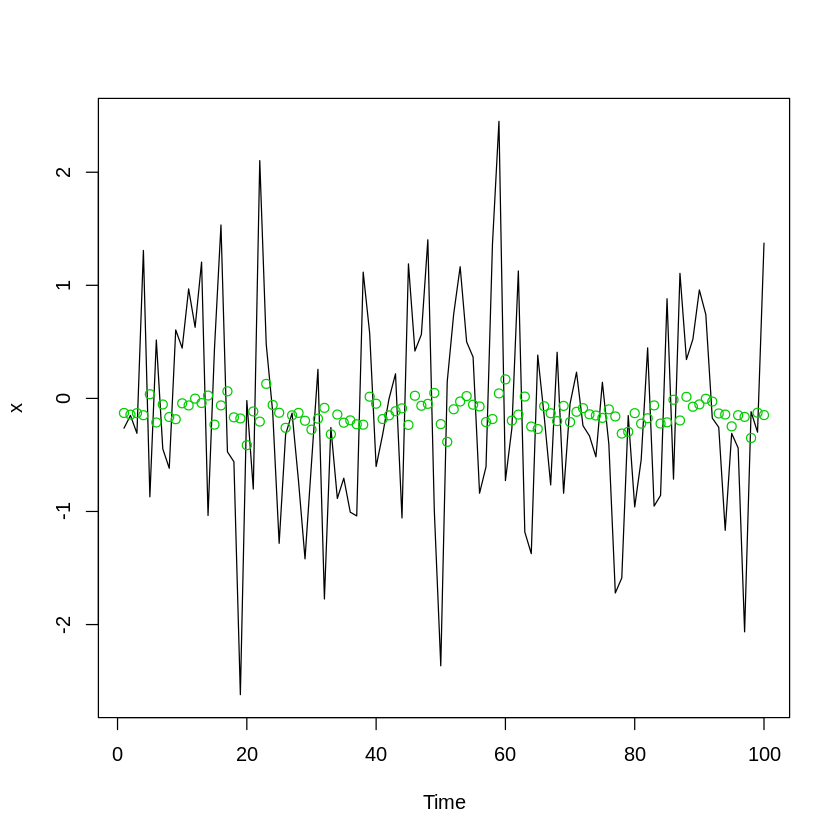

In [21]:
#Plotting the AR series along with fitted value
ts.plot(x)
ar_fit<- x - residuals(ar)
points(ar_fit, col=3, lty =2)

In [22]:
#Forecasting AR Process
predict_ar<-predict(ar)
predict_ar$pred[1]
predict(ar,n.ahead=10)

[1] 0.04443623

$pred
Time Series:
Start = 101 
End = 110 
Frequency = 1 
 [1]  0.04443623 -0.10808987 -0.12560388 -0.12761494 -0.12784587 -0.12787238
 [7] -0.12787543 -0.12787578 -0.12787582 -0.12787582

$se
Time Series:
Start = 101 
End = 110 
Frequency = 1 
 [1] 0.9218306 0.9278879 0.9279675 0.9279686 0.9279686 0.9279686 0.9279686
 [8] 0.9279686 0.9279686 0.9279686

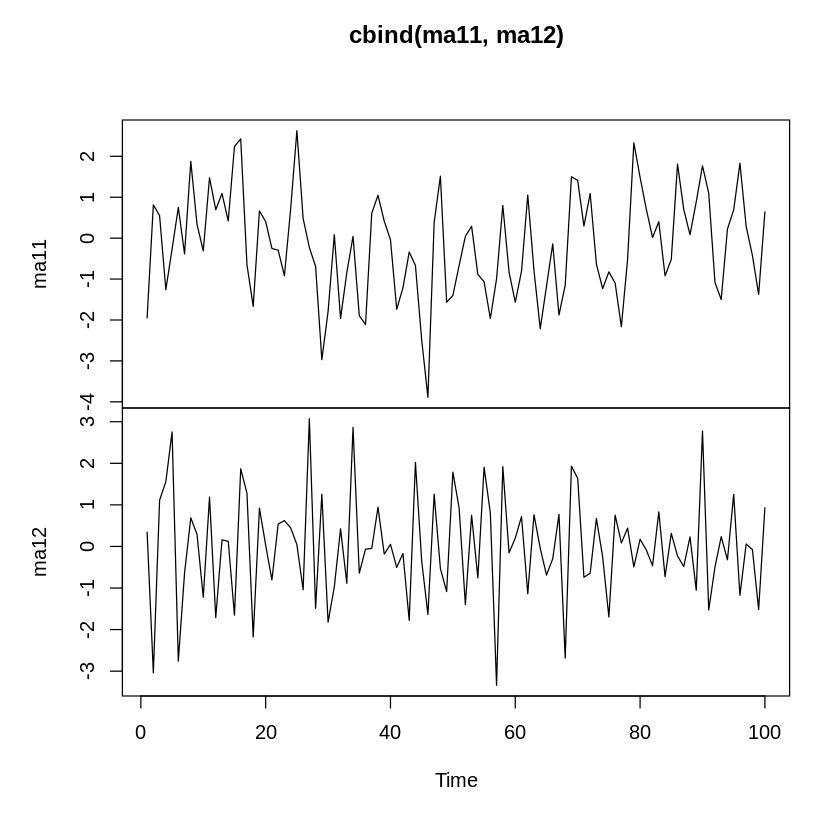

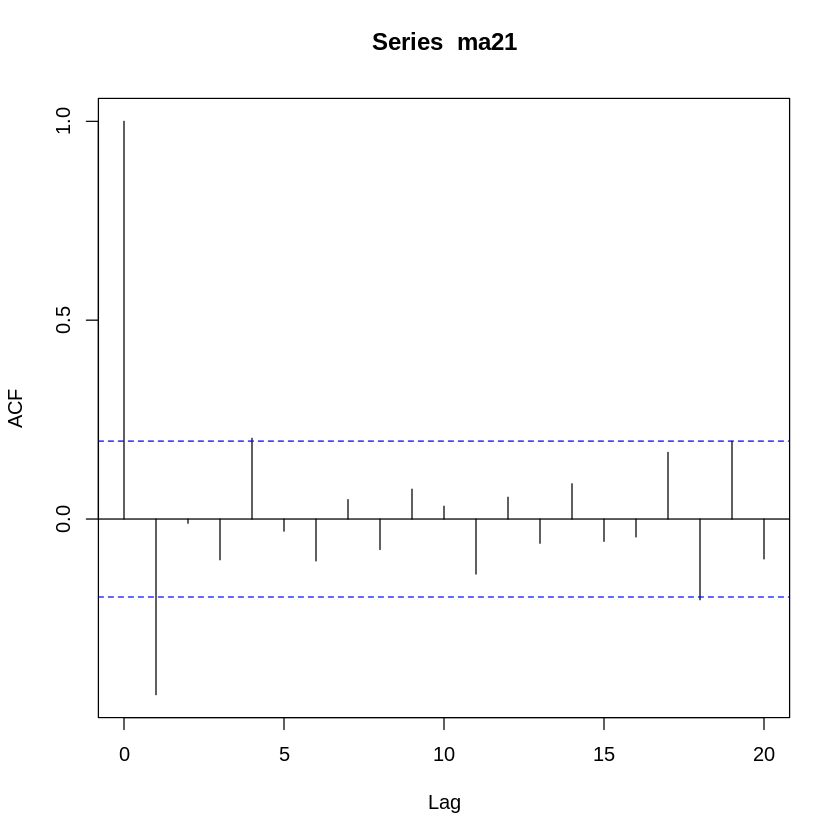

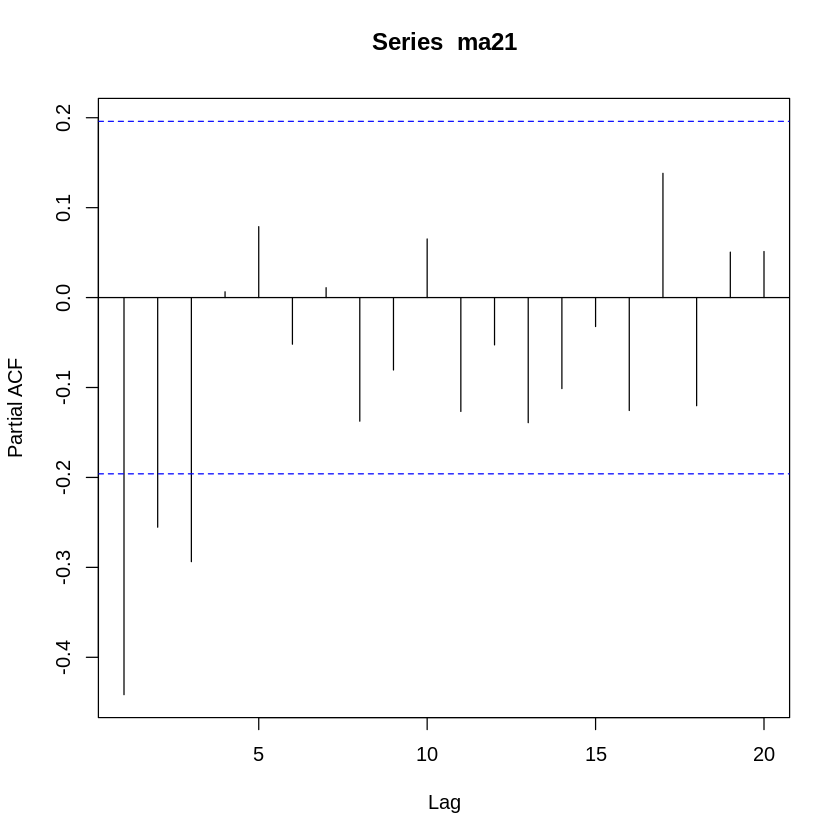

In [1]:
## Moving Average Model
ma11<-arima.sim(model=list(ma=0.7), n=100)
ma12<-arima.sim(model=list(ma=-0.7), n=100)
plot.ts(cbind(ma11,ma12))

ma21<-arima.sim(model=list(ma=c(-0.7,0.1)), n=100)
acf(ma21)
pacf(ma21)

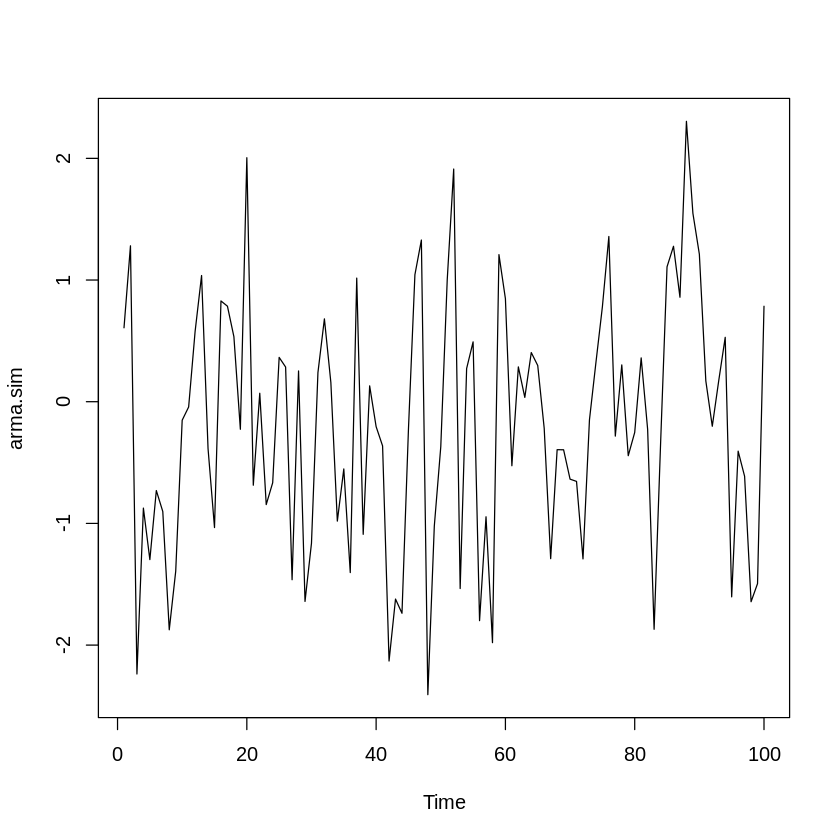

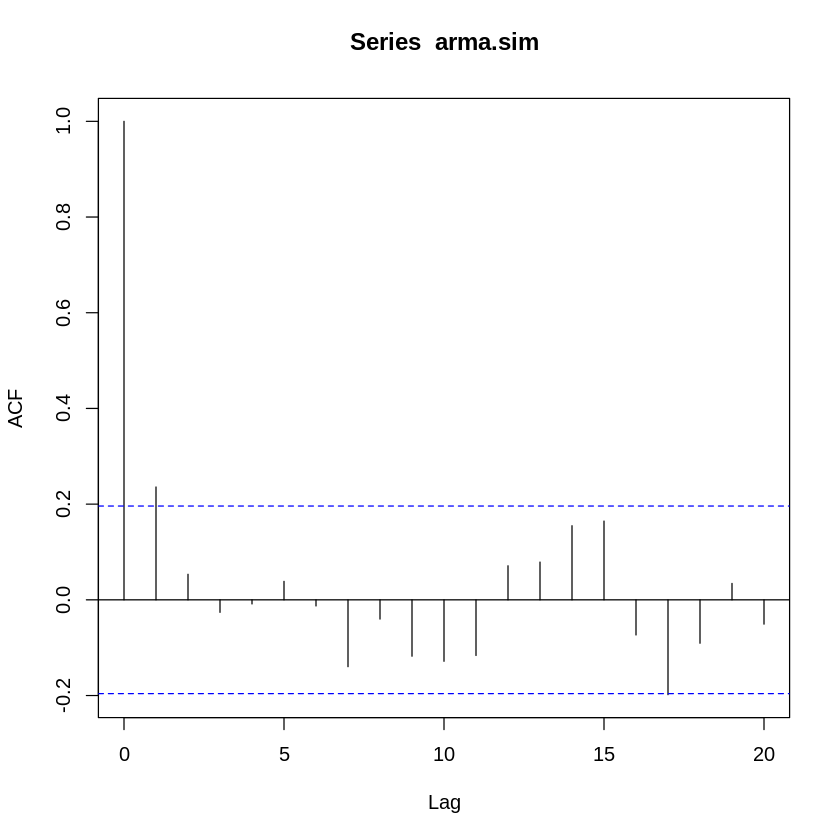

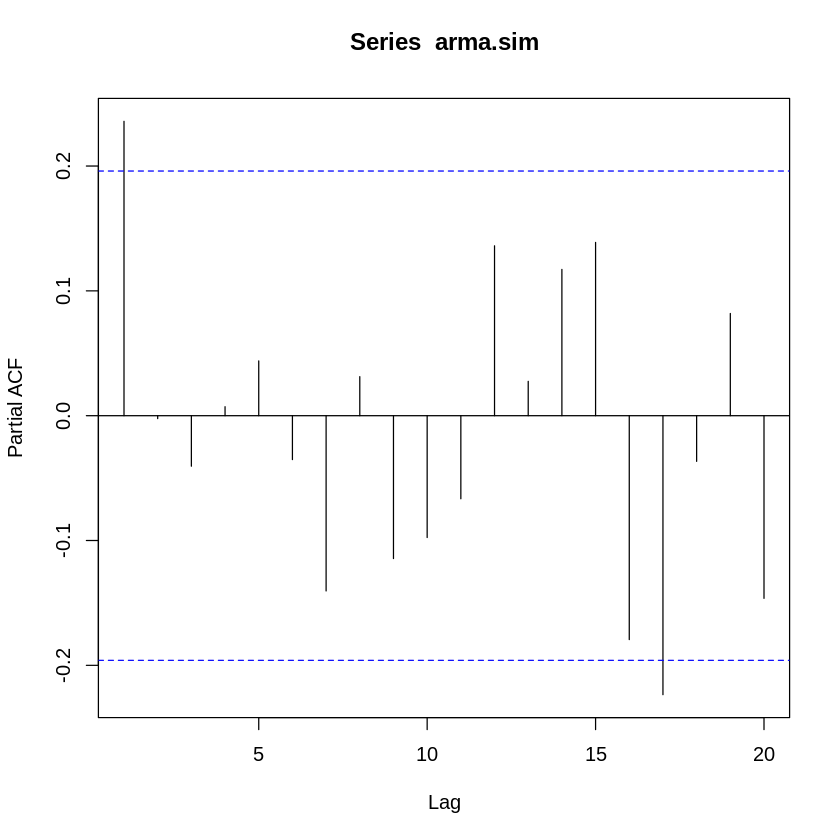

In [2]:
#Estimation of MA process
#Plotting the MA series along with fitted value
#Forecasting MA Process

## ARMA Process
arma.sim<-arima.sim(model=list(ar=c(0.9,-0.2), ma=c(-0.7,0.1)), n=100)
ts.plot(arma.sim)
acf(arma.sim)
pacf(arma.sim)